<a href="https://colab.research.google.com/github/saharshwadekar/googleColabNotebook/blob/main/TextClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [2]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1G4Z7J/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1G4Z7J/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1G4Z7J/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
train_example_batch, train_label_batch = next(iter(train_data.batch(10)))

In [6]:
for example, label in zip(train_example_batch[:3], train_label_batch[:3]):
    print(f'Review: {example.numpy()}\nLabel: {label.numpy()}\n')

Review: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Label: 0

Review: b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish

In [7]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)


In [8]:
print(hub_layer(train_example_batch[:3]))


tf.Tensor(
[[ 1.7657859  -3.882232    3.913424   -1.5557289  -3.3362343  -1.7357956
  -1.9954445   1.298955    5.081597   -1.1041285  -2.0503852  -0.7267516
  -0.6567596   0.24436145 -3.7208388   2.0954835   2.2969332  -2.0689783
  -2.9489715  -1.1315986 ]
 [ 1.8804485  -2.5852385   3.4066994   1.0982676  -4.056685   -4.891284
  -2.7855542   1.3874227   3.8476458  -0.9256539  -1.896706    1.2113281
   0.11474716  0.76209456 -4.8791065   2.906149    4.7087674  -2.3652055
  -3.5015903  -1.6390051 ]
 [ 0.71152216 -0.63532174  1.7385626  -1.1168287  -0.54515934 -1.1808155
   0.09504453  1.4653089   0.66059506  0.79308075 -2.2268343   0.07446616
  -1.4075902  -0.706454   -1.907037    1.4419788   1.9551864  -0.42660046
  -2.8022065   0.43727067]], shape=(3, 20), dtype=float32)


In [10]:
#Model
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400373 (1.53 MB)
Trainable params: 400373 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
history = model.fit(
    train_data.shuffle(1000).batch(512),
    epochs=20,
    validation_data=validation_data.batch(512),
    verbose=1
)

Epoch 1/20
30/30 [==============================] - 11s 284ms/step - loss: 0.7668 - accuracy: 0.5871 - val_loss: 0.6647 - val_accuracy: 0.6137
Epoch 2/20
30/30 [==============================] - 8s 256ms/step - loss: 0.6337 - accuracy: 0.6382 - val_loss: 0.6100 - val_accuracy: 0.6610
Epoch 3/20
30/30 [==============================] - 6s 183ms/step - loss: 0.5789 - accuracy: 0.6827 - val_loss: 0.5613 - val_accuracy: 0.6980
Epoch 4/20
30/30 [==============================] - 6s 219ms/step - loss: 0.5284 - accuracy: 0.7239 - val_loss: 0.5169 - val_accuracy: 0.7336
Epoch 5/20
30/30 [==============================] - 7s 245ms/step - loss: 0.4820 - accuracy: 0.7585 - val_loss: 0.4791 - val_accuracy: 0.7586
Epoch 6/20
30/30 [==============================] - 6s 202ms/step - loss: 0.4424 - accuracy: 0.7863 - val_loss: 0.4485 - val_accuracy: 0.7813
Epoch 7/20
30/30 [==============================] - 5s 168ms/step - loss: 0.4079 - accuracy: 0.8090 - val_loss: 0.4224 - val_accuracy: 0.7965
Epoch

In [14]:
model.save('imdb_sentiment_model')

In [15]:
result = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 4s - loss: 0.3154 - accuracy: 0.8614 - 4s/epoch - 80ms/step


In [16]:
for name, value in zip(model.metrics_names, result):
    print(f'{name}: {value:.3f}')

loss: 0.315
accuracy: 0.861


In [18]:
sample_reviews = [
    "The movie was great! I really enjoyed it.",
    "The movie was terrible. I will not watch it again.",
    "It was an average movie. Not bad but not great either."
]

In [19]:
sample_predictions = model.predict(sample_reviews)

1/1 [==============================] - 0s 228ms/step


In [20]:
for review, prediction in zip(sample_reviews, sample_predictions):
    print(f'Review: {review}\nPredicted sentiment: {prediction[0]:.3f}\n')

Review: The movie was great! I really enjoyed it.
Predicted sentiment: 4.506

Review: The movie was terrible. I will not watch it again.
Predicted sentiment: -1.193

Review: It was an average movie. Not bad but not great either.
Predicted sentiment: -2.854



In [21]:
import matplotlib.pyplot as plt

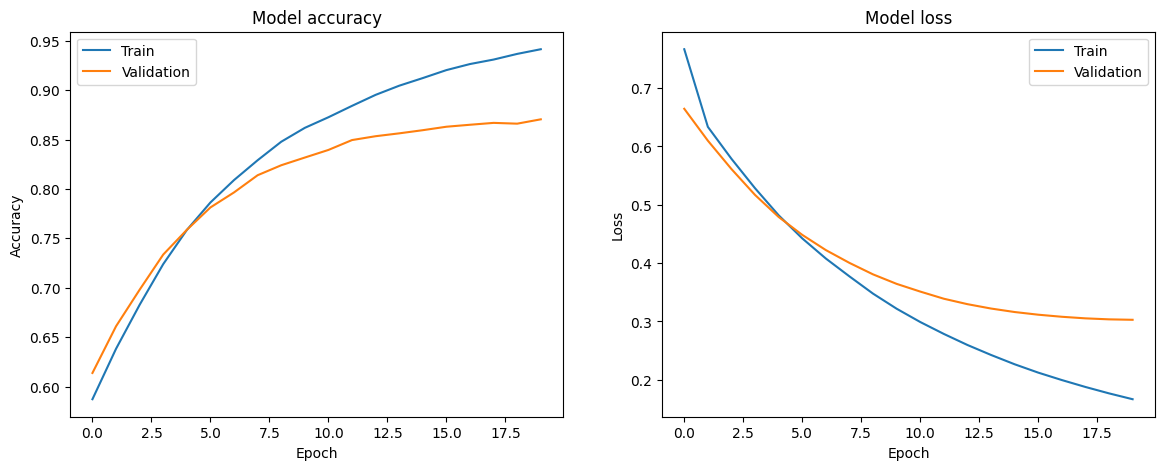

In [25]:
# training & validation
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()